# 10. 시계열
> ## 리샘플링과 빈도 변환

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd

In [4]:
rng = pd.date_range('1/1/2000', periods=100, freq = 'D')
ts = Series(np.random.randn(len(rng)), index = rng)

ts.resample('M').mean()

2000-01-31   -0.009043
2000-02-29   -0.094715
2000-03-31    0.003629
2000-04-30    0.024791
Freq: M, dtype: float64

In [5]:
ts.resample('M', kind = 'Period').mean()

2000-01-31   -0.009043
2000-02-29   -0.094715
2000-03-31    0.003629
2000-04-30    0.024791
Freq: M, dtype: float64

In [6]:
ts.resample('M')

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

- resample은 고수준의 메서드로, groupby와 비슷한 기능도 제공
___
## 1. 다운샘플링

In [7]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index = rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [8]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [9]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [11]:
ts.resample('5min', closed = 'right', label = 'right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

- closed = 'right'은 그룹의 경계 정의 (default = 'left')
- label = 'right'으로 라벨 값 또한 지정 가능

In [13]:
ts.resample('5min', closed = 'right', label = 'right', loffset= '-10s').sum()

1999-12-31 23:59:50     0
2000-01-01 00:04:50    15
2000-01-01 00:09:50    40
2000-01-01 00:14:50    11
Freq: 5T, dtype: int32

- loffset 옵션으로 label 값 변경 가능

In [15]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


- **ohlc 메서드는 금융에서 유용하게 사용하는 4종류 값 집계**

In [16]:
rng = pd.date_range('1/1/2000', periods= 100, freq = 'D')
ts = Series(np.arange(100), index = rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [17]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

- resample 외에도 groupby 메서드를 이용하여 리샘플링 가능
- *lambda 함수 사용 예제 참조*
___
## 2. 업샘플링과 보간


In [20]:
frame = DataFrame(np.random.randn(2, 4),
                 index = pd.date_range('1/1/2000', periods = 2, freq = 'W-WED'),
                 columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.078264,-0.482629,-1.045116,0.165686
2000-01-12,0.120976,0.243179,1.179650,1.488382


In [26]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [30]:
df_daily.first()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.078264,-0.482629,-1.045116,0.165686
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.120976,0.243179,1.179650,1.488382


- 하위 빈도에서 상위 빈도로 리샘플링 시 누락되는 값 발생

In [27]:
df_daily.ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.078264,-0.482629,-1.045116,0.165686
2000-01-06,-1.078264,-0.482629,-1.045116,0.165686
2000-01-07,-1.078264,-0.482629,-1.045116,0.165686
2000-01-08,-1.078264,-0.482629,-1.045116,0.165686
2000-01-09,-1.078264,-0.482629,-1.045116,0.165686
2000-01-10,-1.078264,-0.482629,-1.045116,0.165686
2000-01-11,-1.078264,-0.482629,-1.045116,0.165686
2000-01-12,0.120976,0.243179,1.179650,1.488382


In [31]:
df_daily.ffill(limit = 2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.078264,-0.482629,-1.045116,0.165686
2000-01-06,-1.078264,-0.482629,-1.045116,0.165686
2000-01-07,-1.078264,-0.482629,-1.045116,0.165686
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.120976,0.243179,1.179650,1.488382


In [40]:
df_daily.first().fillna(value = 0)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.078264,-0.482629,-1.045116,0.165686
2000-01-06,0.000000,0.000000,0.000000,0.000000
2000-01-07,0.000000,0.000000,0.000000,0.000000
2000-01-08,0.000000,0.000000,0.000000,0.000000
2000-01-09,0.000000,0.000000,0.000000,0.000000
2000-01-10,0.000000,0.000000,0.000000,0.000000
2000-01-11,0.000000,0.000000,0.000000,0.000000
2000-01-12,0.120976,0.243179,1.179650,1.488382


In [32]:
frame.resample('W-THU').first()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.078264,-0.482629,-1.045116,0.165686
2000-01-13,0.120976,0.243179,1.179650,1.488382


- ffill, fillna 같은 메서드로 결측 값 핸들링 가능
___
## 3. 기간 리샘플링

In [44]:
frame = DataFrame(np.random.randn(24,4),
                 index = pd.period_range('1/2000', '12/2001', freq = 'M'),
                  columns = ['Colorado', 'Texas', 'New York', 'Ohio'])
frame.head()

,Colorado,Texas,New York,Ohio
2000-01,-1.250941,-0.964409,-0.452872,2.135777
2000-02,0.404000,-1.201443,0.229452,-0.551006
2000-03,-0.959798,-2.160651,-1.124101,-0.672502
2000-04,-0.991142,0.177965,-0.818797,0.563008
2000-05,0.406376,-0.533038,-1.346123,-0.422378


In [45]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.363273,-0.651436,-0.248532,0.002024
2001,0.360896,-0.237480,-0.520811,-0.283204


In [48]:
annual_frame.resample('Q-DEC').first()

,Colorado,Texas,New York,Ohio
2000Q1,-0.363273,-0.651436,-0.248532,0.002024
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.360896,-0.237480,-0.520811,-0.283204
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [50]:
annual_frame.resample('Q-DEC', convention = 'end').first()

,Colorado,Texas,New York,Ohio
2000Q4,-0.363273,-0.651436,-0.248532,0.002024
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.360896,-0.237480,-0.520811,-0.283204


___
## 7. 시계열 그래프

In [73]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


In [64]:
close_px_all = pd.read_csv('data/stock_px.csv', parse_dates = True, index_col = 0)
close_px_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9)
memory usage: 427.5 KB


In [61]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [62]:
close_px = close_px.resample('B').ffill()
close_px.head()

,AAPL,MSFT,XOM
1990-02-01,7.86,0.51,6.12
1990-02-02,8.00,0.51,6.24
1990-02-05,8.18,0.51,6.25
1990-02-06,8.12,0.51,6.23
1990-02-07,7.77,0.51,6.33


In [63]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5662 entries, 1990-02-01 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    5662 non-null float64
MSFT    5662 non-null float64
XOM     5662 non-null float64
dtypes: float64(3)
memory usage: 176.9 KB


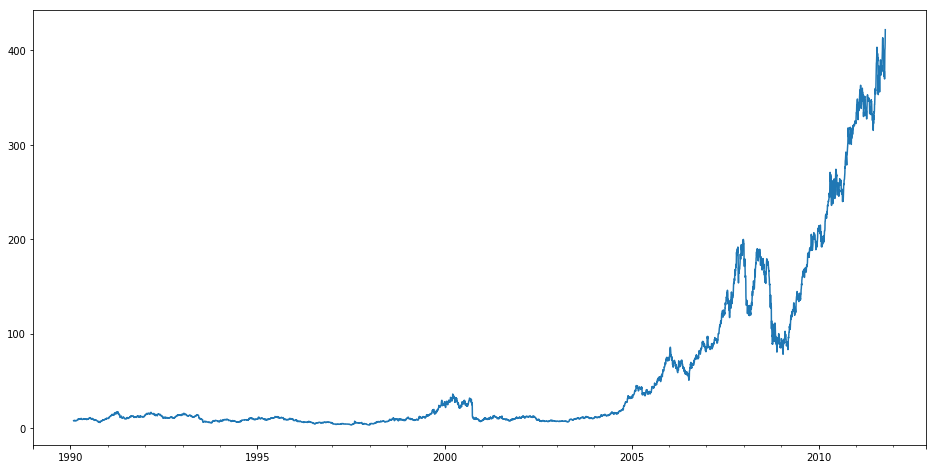

In [74]:
close_px['AAPL'].plot()

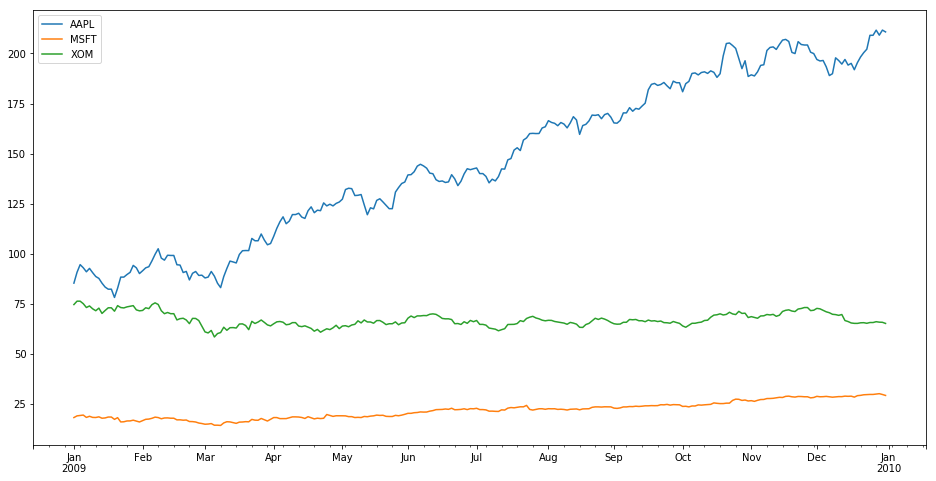

In [75]:
close_px.loc['2009'].plot()

> # !!Date 기반 인덱스에서는 .loc['다양한 날짜 표현식']으로 전처리 가능!!

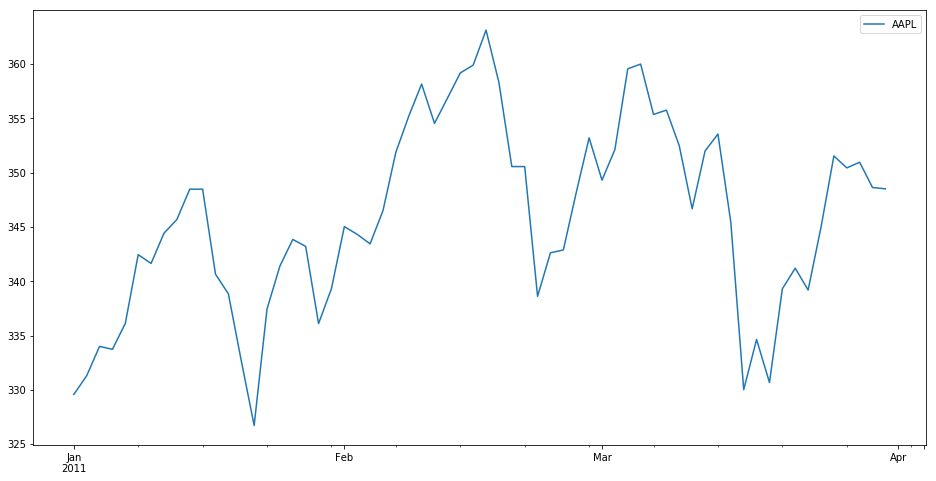

In [80]:
close_px[['AAPL']].loc['01/2011':'03/2011'].plot()

Text(0.5,1,'APPL end price')

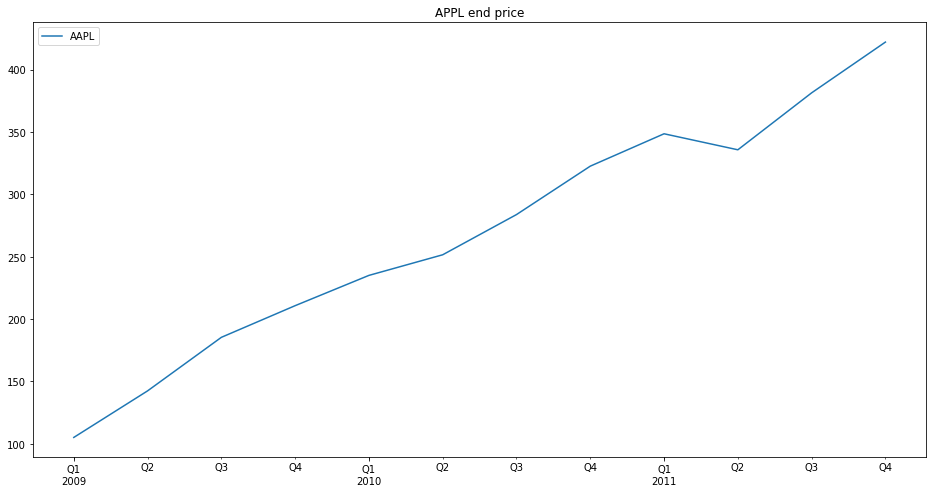

In [88]:
appl_q = close_px[['AAPL']].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot().set_title('APPL end price')


___
## 8. 이동창 기능

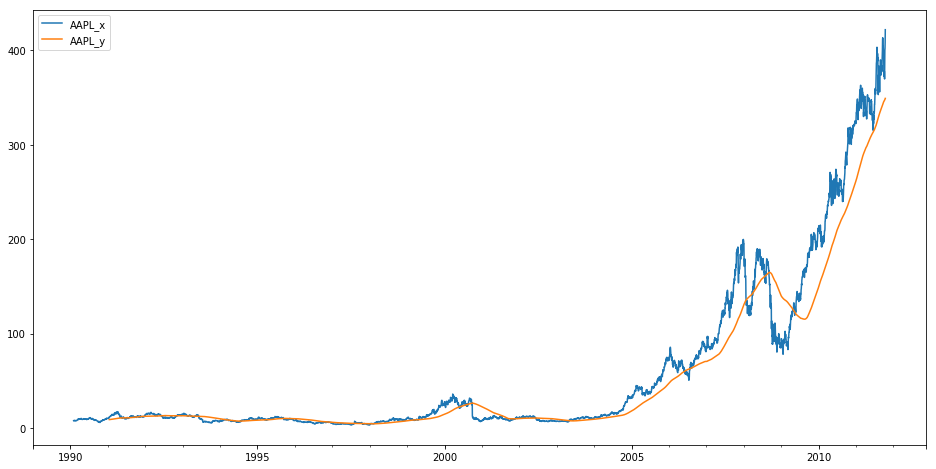

In [118]:
pd.merge(close_px[['AAPL']], close_px[['AAPL']].rolling(window = 250, center = False).mean(), left_index= True, right_index= True).plot()

### close_px[['AAPL']].plot()
### close_px[['AAPL']].rolling(window = 250, center = False).mean().plot()

- rolling은 순차적으로 이동평균을 구해주는 함수
- Series.rolling(window, min_periods = None, freq = None, center = False, win_type = None, axis = 0, closed = None) 이 rolling에 포함된 기능

In [99]:
appl_std250 = close_px[['AAPL']].rolling(250, min_periods = 10).std()
appl_std250[5:12]

,AAPL
1990-02-08,NaN
1990-02-09,NaN
1990-02-12,NaN
1990-02-13,NaN
1990-02-14,0.148189
1990-02-15,0.141003
1990-02-16,0.135454


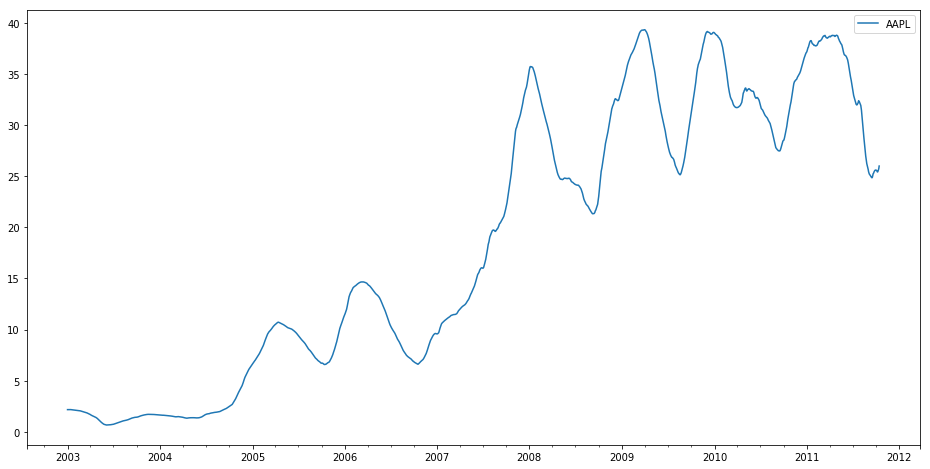

In [101]:
appl_std250.loc['2003':'2012'].plot()

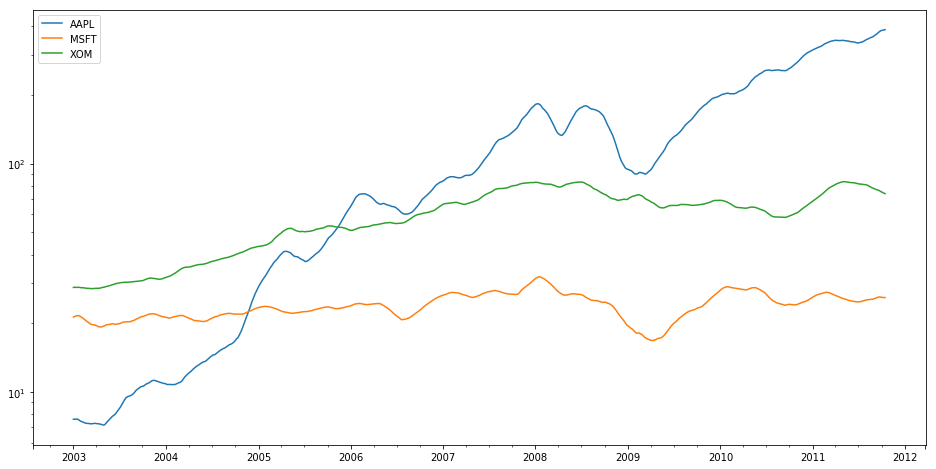

In [123]:
close_px.rolling(60).mean().loc['2003':'2012'].plot(logy = True)

___
## 1. 지수 가중 함수

Text(0.5,1,'Exponentially-weighted MA')

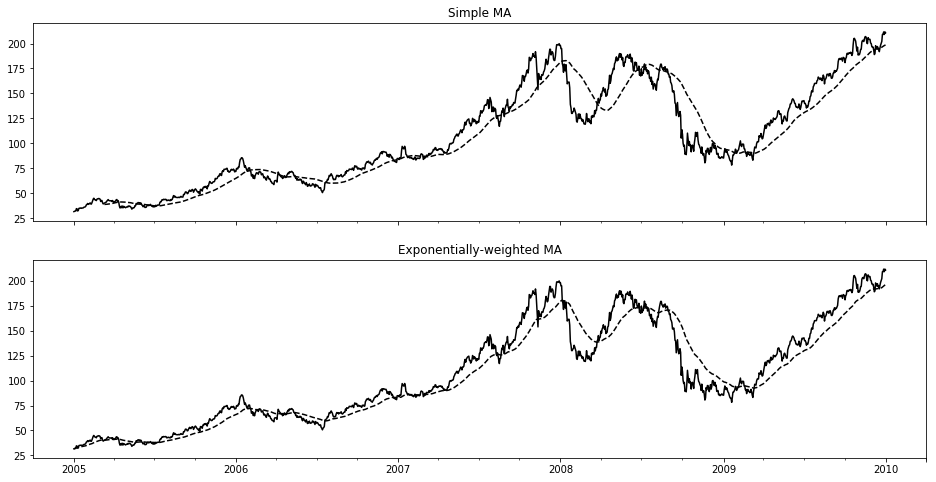

In [125]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True)

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(60, min_periods = 50).mean()
ewma60 = Series.ewm(aapl_px, span = 60).mean()

aapl_px.plot(style = 'k-', ax = axes[0])
ma60.plot(style = 'k--', ax = axes[0])

aapl_px.plot(style = 'k-', ax = axes[1])
ewma60.plot(style = 'k--', ax = axes[1])

axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')